# Midterm Data Science 2000 / Integrated Science 2002. 
## Student ID: xxxxxx
## General comments 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in first 6 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You or not allowed to share documents, or communicate in any other way with people inside or outside the class room during the midterm. You are not allowed to use ChatGPT, co-pilot or any other similar AI - so if you IDE has a copilot plugin, disable it. If you get caught with the plugin enabled, it will be reported as academic dishonesty.**

You need to submit the midterm by the due date (12:20) on OWL under Gradescope/Midterm_OpenBook. Late submission will be scored with 0 pts, unless you have received extra accommodation. So please start your submission five minutes before the deadline!  

### Additional Guidance
The midterm is supposed to be challenging. If you get stuck on a particular question because you can't solve a programming problem, just write down in text *how* you would try to solve the problem - if correct this can give you partial points. Then continue the other parts of the question, the next question, or next task. The midterm is designed, such that the solutions do not require that the previous question is solved correctly. 
If you need the solution from a previous problem, just *assume* some outcome and answer the question under that assumption. If you do this, make your assumptions explicit. 

Read all the questions carefully. Most questions demands a written answer as part of it. These need to be spelled out in a whole English sentence. 

To finish the midterm in the alloted time, you will have to work fast and efficiently. Good luck!

## General grading criteria 
- The code must be working - if you are instructed to test the function, the output needs to the shown. 
- Results should be reported in understandable sentences. 
- Results should be reported rounded to a reasonable number of decimals
- x and y axes should be labeled in plots.
- Each Figure should have a text caption that explains what is displayed in the Figure (type of plot, x,y, grouping variables)


## Preliminaries
You are allowed to use the following packages in python, but no other packages. 

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sb

## Data set 
The data set comes from a study looking at how action video-gaming influences visual processing - and how these effect interact with the intake of performance-enhancing drugs (in this case caffeine). The study recruited 100 undergraduate students with minimal experience in video gaming. The students were randomly assigned to one of two groups. The Experimental group played a First-person shooter game (FPS) for 30 hours over 4 weeks. The control group played a non-action role-playing game (RPG) for the same amount of time. 

The authors also asked the participants whether they regularly use high doses of caffeine (>40mg per day, i.e. 3 Espresso shots or 1 High-caffeine energy drink) while studying. They instructed the participants to follow their normal intake of caffeine during the gaming and during the final attention test. The authors used  caffeine intake as a blocking variable during the random assignment.

The participants were tested on a peripheral visual attention task after the 4 weeks of gaming. In this task, they had to read sentences presented in the middle of the screen and at the same time detect the presence small targets in the visual periphery, but ignore distractors. A higher score on this task indicates better ability to process visual information across the entire visual field in parallel. 

The data frame contains the data fields
- video_game: 	    Whether the participant played a First-person shooter game (FPS) or a non-action role-playing game (RPG).
- age:   		    Age of the person in years 
- caffeine:			Caffeine intake per day during the study (0: < 20mg. 1 > 40mg)
- attention_score: 	Score in the visual attention task, high scores indicate better performance   



## Question 1 (5pt)
Load the video_game_study.csv file and generate a bar plot, which shows the mean of attention scores for the two video game groups, separately for subjects with low and high caffeine intake.

<Axes: xlabel='caffeine', ylabel='attention_score'>

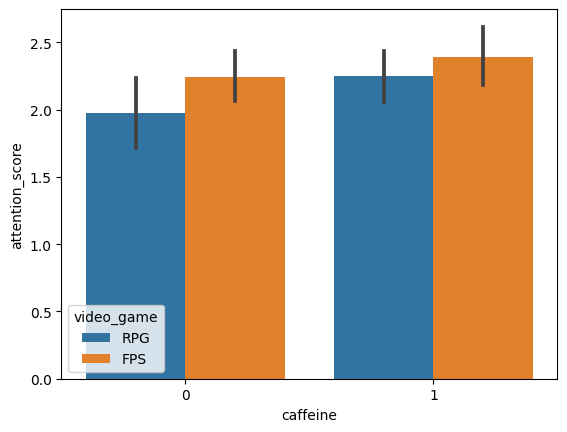

In [2]:
D = pd.read_csv('video_game_study.csv') # 1pts
sb.barplot(data=D,x='caffeine',hue='video_game',y='attention_score') # 3pts for one that shows all four groups (1pt for any barplot)

Figure 1. Bar plot of attention scores for the two video game groups (FPS: ref, RPG: Blue), separately for subjects with low and high caffeine intake (x-axis). [1pt]

## Question 2 (4pts)
Which of the two video game groups has a higher attention score? Which one of the two caffeine groups has a higher attention score? If these effects were significant, could you conclude that playing a FPS game (causally) improves attention scores? Could you conclude that that taking more than 40mg of caffeine (causally) improves attention score? 

The FPS has a higher score than the RPG group. [1pt]

The high caffeine group has a higher score than the low caffeine group. [1pt]

We can conclude that playing a FPS game causally improves attention scores, because the participants were randomly assigned to the video game group. [1pt] 

We cannot conclude that taking more than 40mg of caffeine causally improves attention score, because the caffiene intake was not experimentally manipulated and the groups were not randomly assigned. Other confounding factors cannot be excluded. [1pt]



## Question 3 [4pts]
Generate a box-plot the ages of the participants in the two groups.
What is the video-game group of the oldest participant? What is the caffeine group of the oldest participant? 

<Axes: xlabel='caffeine', ylabel='age'>

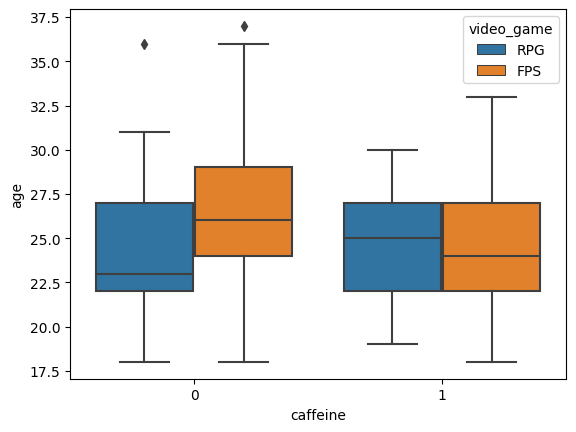

In [3]:
sb.boxplot(data=D,x='caffeine',hue='video_game',y='age')  # 2pts


Figure 2. Box plot of ages [in years] in the two video game groups (FPS: ref, RPG: Blue), separately for subjects with low and high caffeine intake (x-axis). [1pt]

The oldest individual is in the FPS, low caffeine group. [1pt]

## Question 4 (4pts)
Check whether the authors of the study were successful in using caffeine intake as a blocking variable. Did they do it correctly? 


In [4]:
pd.crosstab(D.video_game,D.caffeine) # 2pts for correct crosstab counts

caffeine,0,1
video_game,,
FPS,25,25
RPG,25,25


Yes - the authors assigned an equal number of caffeine users and non-users to each video-game group. [2pt for crosstab counts, 2 pt for the correct interpretation of blocking variable]

## Question 5 (3pt)
We want to use a frequentist approach to test the hypothesis that 30hrs of playing a first-person shooter game increases the attention score on the visual attention test. 
Formulate the alternative hypothesis. and null hypothesis for this test. For this test, we will ignore the influence of caffeine intake.

>Alternative Hypothesis: The FPS group will have a higher attention score that the RPG control group (1pts)

>Null Hypothesis: The FPS group will have a lower or equal attention score that the RPG control group (2pts)


## Question 6 (4pts)
Write a function that calculates the mean difference in the attention score between the FPS and RPG groups. Positive values should refer to the FPS group having a higher attention score. Test the function with the data set and report the results. 

In [5]:
def mean_difference(D):  # Use Function to calculate the mean difference (2pts)
    T = D.groupby(['video_game']).attention_score.mean()
    return(T['FPS'] - T['RPG'])

d = mean_difference(D)      # Report correct mean difference (1pts)
print(f'The mean difference is {d:.3f}') # Rounded appropriately (1pts)

# If the correct mean difference is reported without writing a function: max 2 points.

The mean difference is 0.206


## Question 7 (9pt)
Perform a randomization test to test whether you can reject the Null-hypothesis formulated in Question 5. Your code should produce a figure that shows the distribution of chosen test statistics under the Null hypothesis, as well as the empirical value as a vertical line.  Remember to provide axis labels and a caption. 
Written answer: Report the value of the statistics and the associated p-value, using at least 5000 iterations. What do you conclude regarding the hypotheses formulated above, using a significance threshold of p=0.05? 

In [6]:
# Helper function:
def randomize_column(df,colname):
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    df_copy[colname]=var
    return df_copy

# Randomization test function
def randomization_test(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S= randomize_column(D,shuffle)
        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Calculate the real test statistic
    realTS = fcn(D)

    # 4. Plot a histogram of the
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')

    # 5. determine p-value (one sided) with rejection region above the threshold
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
    # 5. determine p-value (two sided) with rejection region outside the threshold

    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=np.absolute(realTS))/len(listOfTS)
    print(f' P-value of the randomisation test is p = {p:.3f}')
    return p

 P-value of the randomisation test is p = 0.037


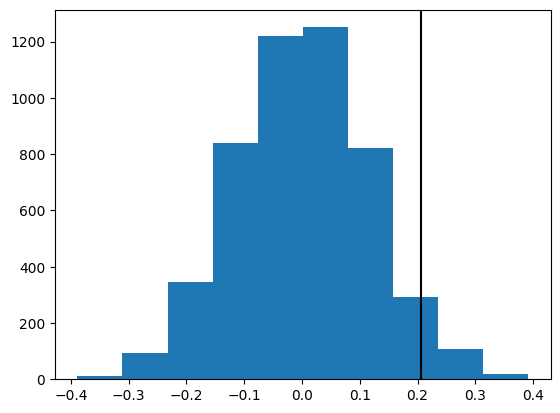

In [7]:
P = randomization_test(D,mean_difference,'video_game',numIterations=5000,sides=1, nbins = 10)

*Figure 2*. Histogram showing the distribution of test statistic under the null hypothesis. p-values corresponding to a two-sided test are shown as vertical lines. 

Based on the results of the permutation test, we can reject the null hypothesis that the attention score of the FPS group is equal or lower than the attention score of the RPG group. The p-value is 0.03, which is lower than the significance threshold of 0.05. 



*grading:* <br>
3 pts for randomization test <br>
2 pts for figure <br>
1 pt for caption <br>
3 pts for p-value and decision (if wrong p-value, check if decision is correct)
Give full points if the test is appropriate for an earlier mistake in formulating the Null-hypothesis (Question5)

In [8]:
# alternative solution
# Randomization test function
def randomization_test_v2(df,fcn,shuffle_var,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S=df.copy()                    # Make copy of the data frame
        x = np.array(range(len(df.index))) # Make copy of data frame index
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself!
        y = S[shuffle_var].iloc[x]   # copy the newly reorded values into a new Series
        y = y.reset_index(drop=True)   # reoder the indices
        S[shuffle_var]=y           # assign back into the data frame (replace the old column with the shuffled column)

        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Calculate the real test statistic
    realTS = fcn(D)

    # 4. Plot a histogram of the
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')

    # 5. determine p-value (one sided) with rejection region above the threshold
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
    # 5. determine p-value (two sided) with rejection region outside the threshold

    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=np.absolute(realTS))/len(listOfTS)
    print(f' P-value of the randomisation test is p = {p:.3f}')
    return p


 P-value of the randomisation test is p = 0.035


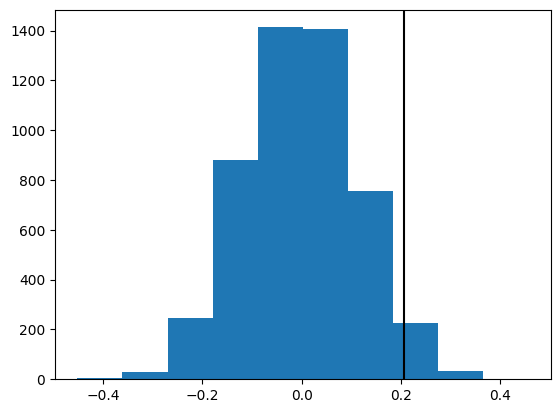

In [9]:
P2 = randomization_test_v2(D,mean_difference,'video_game',numIterations=5000,sides=1, nbins = 10)

## Question 8 (9pt)
There maybe a difference how video games influence attention score, depending on caffeine intake. Perform the permutation test for  participants for the group that consumed caffeine and the group that did not consume caffeine during the attention test separately. You can skip a caption if you plot a histogram, but the p-value for each group needs to be clearly reported.  

Written answer: Conclude for each group separately whether you can reject the null hypothesis that playing the FPS game increases the attention score - again use a significance threshold of p=0.05.
Why does the conclusion seem logically inconsistent with the results of the test in Question 7?
What are possible reasons for this inconsistency?

 P-value of the randomisation test is p = 0.057


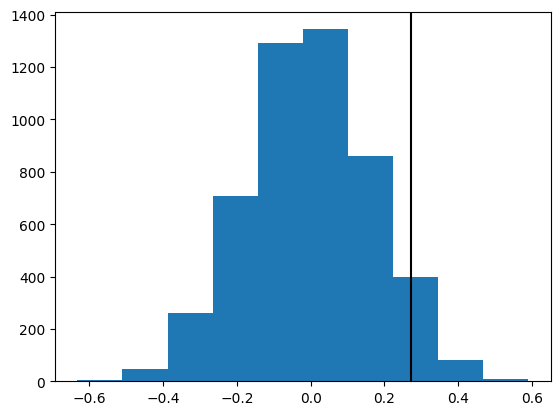

In [10]:
P = randomization_test(D[D.caffeine==0],mean_difference,'video_game',numIterations=5000,sides=1, nbins = 10) #[2pts]


 P-value of the randomisation test is p = 0.181


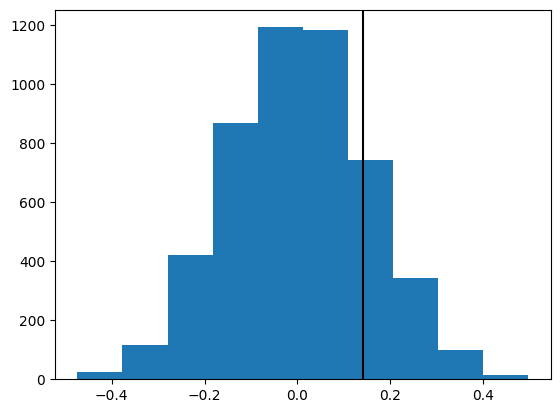

In [11]:
P = randomization_test(D[D.caffeine==1],mean_difference,'video_game',numIterations=5000,sides=1, nbins = 10) # [2pts]

We can not reject the null hypothesis for the low caffeine group (p=0.058), nor can we reject the null hypothesis for the high caffeine group (p=0.17). [2pts]

This seems logically inconsistent with the answer we had in Question 7. There, we concluded that the FPS group had a higher attention score than the RPG group overall. But now we conclude that there is no significance difference for either the low or high caffeine group. [1pts]

The reason for the inconsistency is that a Null-result in frequentist testing does not mean that there is no difference. The lack of significant results could be caused by a lack of power when we split oup our large sample (N=100) into two smaller samples (N=50). [2pts]

In [12]:
# alternative solution

df_1 = D[D.caffeine==0].reset_index(drop=True)
df_2 = D[D.caffeine==1].reset_index(drop=True)

 P-value of the randomisation test is p = 0.055


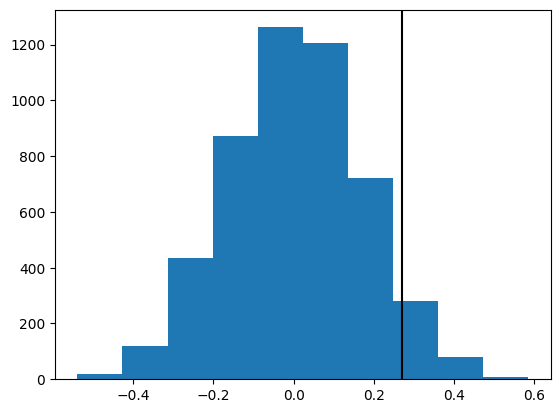

In [13]:
P = randomization_test(df_1,mean_difference,'video_game',numIterations=5000,sides=1, nbins = 10) #[2pts]

 P-value of the randomisation test is p = 0.175


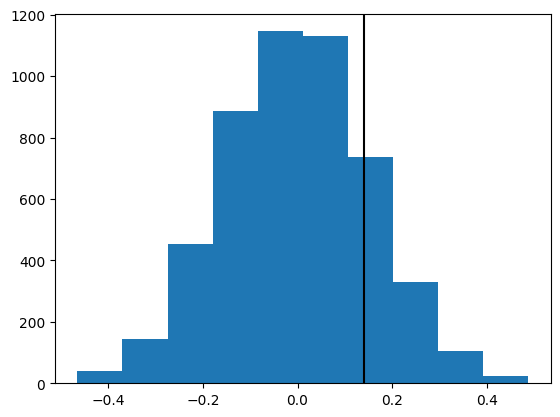

In [14]:
P = randomization_test(df_2,mean_difference,'video_game',numIterations=5000,sides=1, nbins = 10) #[2pts]

## Question 9 (8pts)
In the randomization test performed in Question 7, you were instructed to ignore the caffeine intake and simply shuffle the group assignment of the participants. However, the authors of the study were careful to balance the number of caffeine users and non-users in the two groups (they blocked for caffeine intake). 

Written answer: What is consequence ignoring the blocking variable in the randomization test in Question 7? How does will this likely change our distribution of the test statistics? What is the influence on our p-value? 

To test the effect of video-gaming on the attention score overall, the best way however, is to perform and permutation test that takes into account the blocking variable. Write a function that performs a permutation test for the difference in attention score between the two groups, ensuring that the number of caffeine users and non-users is the same in the two groups. Test the function with the data set and report the results. 

By ignoring the blocking variable, the assignment of the caffeine users and non-users to the video game groups **is not the same in each iteration of the permutation test.** [1pt] 

Because caffeine appears to have an influence on attention score, this could **increase the variability of the test statistics in the permutation test** [1pt],

 leading to a **higher p-value.** [1pt]

In [15]:
# Working solution for balanced assignment 3 pts
def randomization_test_blocking(D,fcn,shuff_col,block_col,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data for each block separately and then combine them
        S = D.groupby(block_col,group_keys=False).apply(randomize_column,shuff_col) # 5pts
        # Alternative solutions are possible:
        # S1 = randomize_column(D[D.caffeine==0]),shuff_col)
        # S2 = randomize_column(D[D.caffeine==1]),shuff_col)
        # S = pd.concat([S1,S2])
        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Calculate the real test statistic
    realTS = fcn(D)

    # 4. Plot a histogram of the
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')

    # 5. determine p-value (one sided) with rejection region above the threshold
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
    # 5. determine p-value (two sided) with rejection region outside the threshold

    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=np.absolute(realTS))/len(listOfTS)
    print(f' P-value of the randomisation test is p = {p:.3f}')
    return p

 P-value of the randomisation test is p = 0.030


0.0302

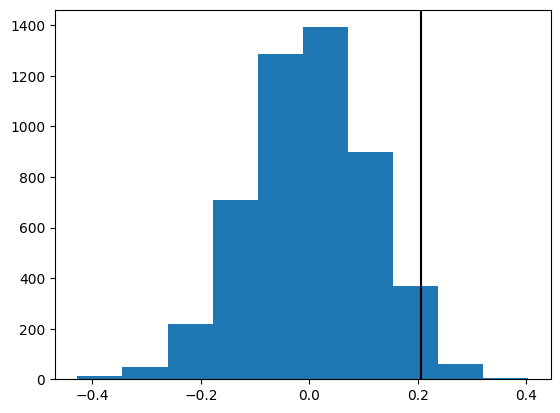

In [16]:
randomization_test_blocking(D,mean_difference,'video_game','caffeine',numIterations=5000,sides=1, nbins = 10) # Test and report of correct p-value (1pts)

Distribution of mean difference from a permutation test with blocking. the line indicates the empirical value. [1pt]

In [17]:
# Alternative solution
# Working solution for balanced assignment 3 pts
def randomize_column_v2(df,shuffle_var):
    S=df.copy()                    # Make copy of the data frame
    x = np.array(range(len(df.index))) # Make copy of data frame index
    np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself!
    y = S[shuffle_var].iloc[x]   # copy the newly reorded values into a new Series
    y = y.reset_index(drop=True)   # reoder the indices
    S[shuffle_var]=y
    return S

def randomization_test_blocking_v2(D,fcn,shuff_col,block_col,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data for each block separately and then combine them

        df_copy = D.copy()
        S1 = randomize_column_v2(df_copy[df_copy.caffeine==0].reset_index(drop = True),shuff_col)
        S2 = randomize_column_v2(df_copy[df_copy.caffeine==1].reset_index(drop = True),shuff_col) # 5pts
        S = pd.concat([S1,S2])
        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Calculate the real test statistic
    realTS = fcn(D)

    # 4. Plot a histogram of the
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')

    # 5. determine p-value (one sided) with rejection region above the threshold
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
    # 5. determine p-value (two sided) with rejection region outside the threshold

    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=np.absolute(realTS))/len(listOfTS)
    print(f' P-value of the randomisation test is p = {p:.3f}')
    return p

 P-value of the randomisation test is p = 0.031


0.031

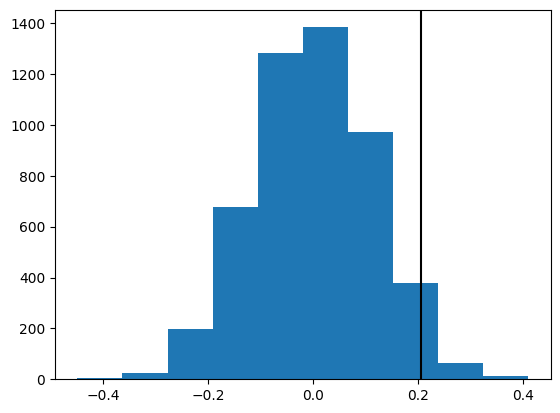

In [18]:
randomization_test_blocking_v2(D,mean_difference,'video_game','caffeine',numIterations=5000,sides=1, nbins = 10) # Test and report of correct p-value (1pts)